# Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Prepare the data

For graphic representations we can read/open the Log 2 transformed data we saved with the Data_graphic_representation notebook. Then, data needs to be filtered as it is really large to graph it. That's why we pick the most representative samples based on their median, as it is more robust than using samples mean; specially as we have right-skewed distribution in our data so mean of the samples are shifted to the right.

In [2]:
file_path = '/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/log2expressiondata.csv'
log_df = pd.read_csv(file_path, index_col = 0)
log_df.head(5)

,77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv,6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv,59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv,5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv,c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv,7d9c7c34-76e0-4622-b5f7-60e12f6d4e07.rna_seq.augmented_star_gene_counts.tsv,32675d71-6f79-4b8f-ab7c-e2350b15875c.rna_seq.augmented_star_gene_counts.tsv,3d11905a-16eb-40b2-a36b-e37dca6359d3.rna_seq.augmented_star_gene_counts.tsv,...,4c87674d-dd05-490d-a584-84490509f4d4.rna_seq.augmented_star_gene_counts.tsv,5cfb768f-7b49-4a72-92c9-d7502f5ba5b8.rna_seq.augmented_star_gene_counts.tsv,03ef99c7-55b7-4770-9eac-2ee007aa78ca.rna_seq.augmented_star_gene_counts.tsv,3ab1dfbc-ab83-446e-b680-cd6aec12b177.rna_seq.augmented_star_gene_counts.tsv,029a2c3e-0fd1-4cb4-9021-3947d28ca28d.rna_seq.augmented_star_gene_counts.tsv,ed41fe8b-fe2e-4bf3-91e3-2cf50ddcbc78.rna_seq.augmented_star_gene_counts.tsv,b9a5766c-e155-423e-a075-10fb14fe87df.rna_seq.augmented_star_gene_counts.tsv,a462c0f9-23d3-428b-9b61-e42cb6a68af1.rna_seq.augmented_star_gene_counts.tsv,0d3cfbc0-4420-48ed-a459-2e18d2ece5b6.rna_seq.augmented_star_gene_counts.tsv,d43517e2-e447-42cc-93e1-cbc9669ef4f1.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,5.853883,6.242844,5.877366,5.554976,3.746270,5.778416,6.605066,6.116313,5.103242,5.100397,...,5.004560,5.073456,5.734804,5.092191,5.545338,5.857862,5.716747,5.352275,5.517622,3.911040
ENSG00000000005.6,0.000000,0.222557,0.000000,0.000000,0.107688,0.088956,0.000000,0.000000,0.000000,1.341758,...,0.000000,0.000000,0.035061,0.055335,0.065021,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419.13,6.474339,6.794343,7.083010,7.648951,5.943865,5.608244,6.771603,6.813068,5.584301,6.713725,...,6.198396,6.507392,6.843400,6.794808,6.137436,6.854949,6.647530,6.690696,7.539495,6.633021
ENSG00000000457.14,3.294180,3.387142,3.666132,4.221467,2.147893,2.470016,4.229765,3.583724,2.693632,4.618344,...,2.987357,2.368098,3.344133,3.016461,2.465060,3.315856,2.725916,2.816661,2.570171,2.630732
ENSG00000000460.17,2.783813,2.667915,2.528596,2.275037,1.197425,1.931305,4.033529,3.424828,1.687509,4.613820,...,3.734807,2.546240,3.385155,2.828977,1.683876,3.925373,2.505129,2.827535,3.220438,2.804818


In [3]:
median_by_sample = log_df.median()   

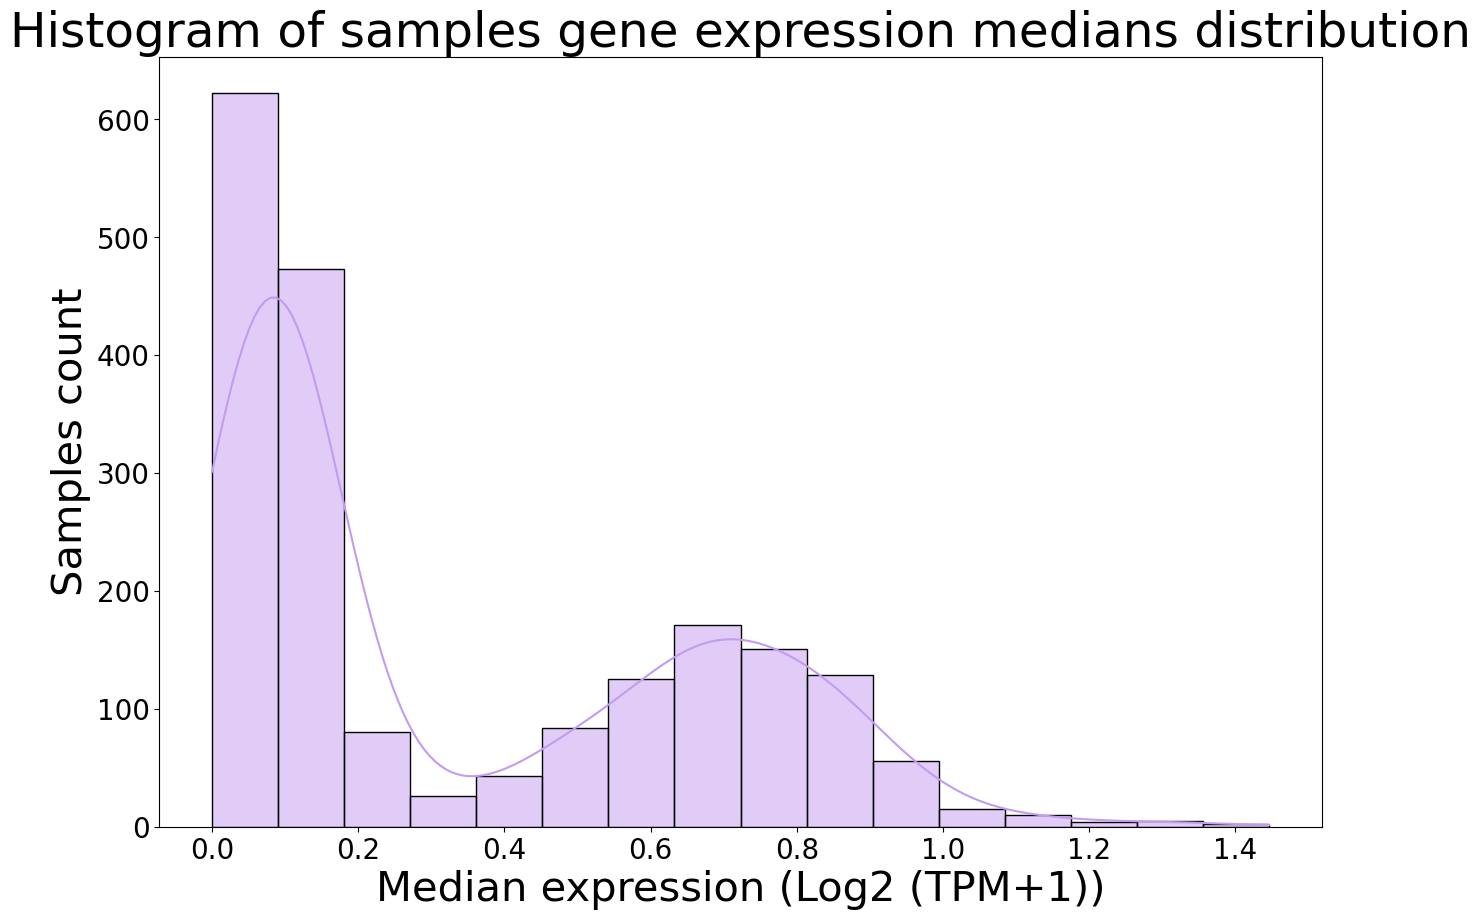

In [4]:
plt.figure(figsize = (15, 10))
sns.histplot(data = median_by_sample, x = median_by_sample[1:], kde = True, color = '#C39BF1')

plt.title('Histogram of samples gene expression medians distribution', fontsize = 35)
plt.ylabel('Samples count', fontsize = 30)
plt.xlabel('Median expression (Log2 (TPM+1))', fontsize = 30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/histogram.png')

Some samples from the two peaks of the median distribution are picked arbitrarily.

In [5]:
rep_samples_1 = (median_by_sample >= 0.095 ) & (median_by_sample <= 0.105 )
print(pd.Series(rep_samples_1).value_counts())
rep_samples_2 = (median_by_sample >= 0.695 ) & (median_by_sample <= 0.705 )
print(pd.Series(rep_samples_2).value_counts())

subset = log_df.loc[:, rep_samples_1 | rep_samples_2]
subset.head(5)

False    1921
True       76
Name: count, dtype: int64
False    1980
True       17
Name: count, dtype: int64


,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,d3ebb2ea-10db-4c29-8e7c-7c13b23b5b15.rna_seq.augmented_star_gene_counts.tsv,7a7440bf-1ca1-4c6b-80f8-7151a38e5d18.rna_seq.augmented_star_gene_counts.tsv,36db1d28-8a10-46cc-91ef-d5036aaba9c3.rna_seq.augmented_star_gene_counts.tsv,aa0b2722-97db-4b5a-9a56-213f63255097.rna_seq.augmented_star_gene_counts.tsv,e8ea2e59-65dc-49c9-b6f3-b9335185390d.rna_seq.augmented_star_gene_counts.tsv,5511e816-3ce5-4d0c-80a7-71ee42ba8fc9.rna_seq.augmented_star_gene_counts.tsv,1890feb6-9f7f-4437-9828-198ff43e16b0.rna_seq.augmented_star_gene_counts.tsv,0a11e8dc-5d34-4fcb-b2dc-aa57b4e90fc9.rna_seq.augmented_star_gene_counts.tsv,dd20e202-a63c-4281-85c7-f16096212a91.rna_seq.augmented_star_gene_counts.tsv,...,fcc330dd-5ebe-4b5e-9bb7-00e8fe19232c.rna_seq.augmented_star_gene_counts.tsv,8fc6eee8-3ec1-4f6c-a07b-f539ef9cad39.rna_seq.augmented_star_gene_counts.tsv,4f179a2f-1e37-4ad9-9f21-0a6f1ecdf03e.rna_seq.augmented_star_gene_counts.tsv,3169371f-5fd0-40b5-838e-9c57dded9137.rna_seq.augmented_star_gene_counts.tsv,649e5ee8-e10c-4268-a1d7-77b38f5154ea.rna_seq.augmented_star_gene_counts.tsv,fbf226a9-b07a-4aa2-bcb6-ceaac4b373c0.rna_seq.augmented_star_gene_counts.tsv,1827bc9b-0b11-493a-af09-17d13f57698a.rna_seq.augmented_star_gene_counts.tsv,b1840b93-f4c6-4308-bcc4-63da00cd7e8b.rna_seq.augmented_star_gene_counts.tsv,5d83245d-083a-4728-9637-d1c1c2f69d9f.rna_seq.augmented_star_gene_counts.tsv,2ca30f8b-ed4e-478d-87cc-59a4e8249d94.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,5.778416,6.845089,4.440128,5.133288,6.254103,4.340498,4.593420,6.572735,6.046100,5.148857,...,5.239406,5.572584,4.596476,5.571073,4.940862,5.455521,5.276039,4.736313,5.826683,4.556460
ENSG00000000005.6,0.088956,0.000000,0.174918,0.000000,0.295605,0.000000,0.230080,2.468427,0.081749,0.000000,...,0.000000,0.048236,0.106214,0.065848,0.000000,0.000000,0.000000,0.061154,0.000000,0.231801
ENSG00000000419.13,5.608244,6.418473,5.589922,6.620836,6.059494,6.180094,6.077581,7.006963,6.709613,6.846496,...,6.424412,6.714894,7.019358,7.582023,7.102940,6.805656,7.211471,7.230950,6.839325,6.056662
ENSG00000000457.14,2.470016,3.158644,3.675929,3.424062,4.066399,2.024816,2.752984,3.034022,2.851579,3.224966,...,3.004358,2.742675,3.255682,2.741877,3.377179,2.824442,2.414027,3.105846,2.957915,2.436348
ENSG00000000460.17,1.931305,3.221460,2.449218,3.240818,1.940994,1.921513,1.212258,2.254473,3.568215,3.845771,...,3.338938,2.964861,3.321870,3.464080,3.533264,2.705514,2.489183,3.949852,2.815780,1.057069


# Graphic representations of data distribution
## Density plot

With the density plot we can visualize the gene expression values per sample and explore their distribution characteristics to know how the data looks like. We can see that most genes have expression values about 0 to 1 TPMs along samples, but TPMs variance of is really wide and distribution is assymetric (right-skewed) due to overexpressed genes. 
With that overexpressed genes we are going to be able to identify patterns of discrimination in gene expression, to determine lung cancer subtypes.

In the histogram done before, it is seen that around the data there's to groups of samples: the first group median is around 0.1 and the second group median is around 0.7; so we are ploting some samples of both groups to represent the overall data. As our dataset is from different projects collected in TCGA, the fact that two groups are showing in the histogram by their median expression, could be due to technical issues in the experiments of the projects; so the next step of our project must be to normalize the data.

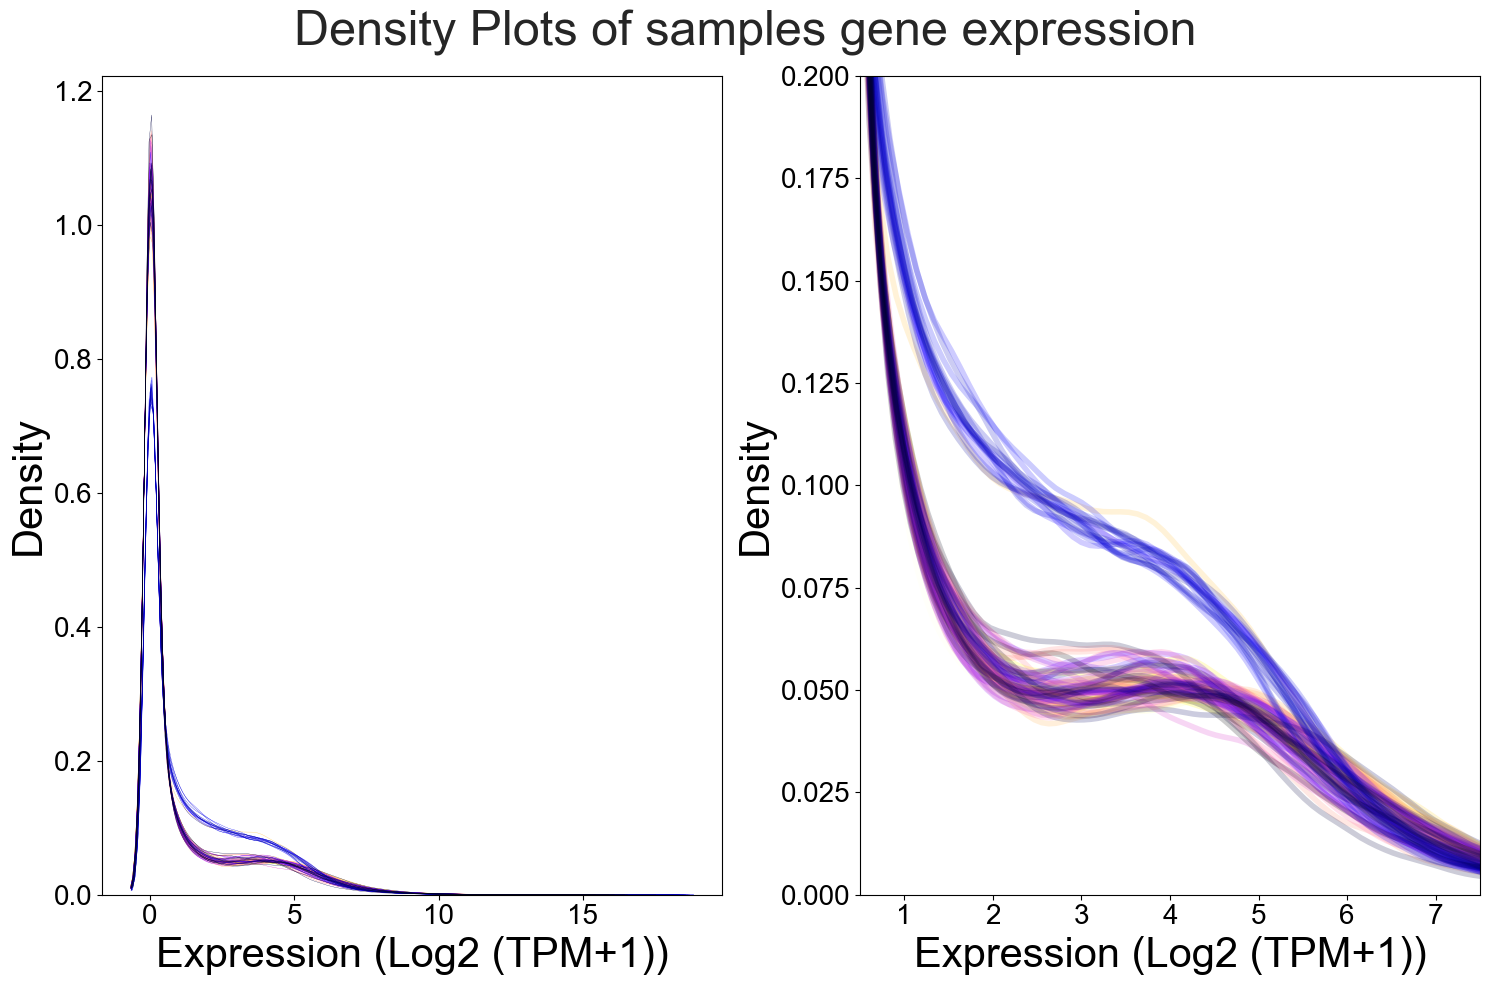

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.set_style('whitegrid')


sns.kdeplot(data = subset, ax = axes[0], common_norm = False, legend = False, palette = 'gnuplot2', linewidth = .2)
sns.kdeplot(data = subset, ax = axes[1], common_norm = False, legend = False, palette = 'gnuplot2', linewidth = 4, alpha = .2)

axes[1].set_xlim(0.5, 7.5)
axes[1].set_ylim(0, 0.2)

for ax in axes:
    ax.set_xlabel('Expression (Log2 (TPM+1))', fontsize=30)
    ax.set_ylabel('Density', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=20)
plt.suptitle('Density Plots of samples gene expression', fontsize=35)

plt.tight_layout()
plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/densityplot_2.png')

## Boxplot

The boxplot, shows as a summary how TPM data spread out for each sample. We can compare the samples as the boxplot divides the data into sections. Interesting ones for the type of data we have are the IQR and outliers. In this boxplot we can also see the two groups of samples as with the boxplot: the main difference is that group 2 IQR, the range where most genes expression values are, are pretty larger than group 1 ones. Maximum values and outliers of group 2 samples are also generally higher. Focusing on the boxplots outliers we can see how overexpressed genes values are distributed, that are the ones we are most interested in.

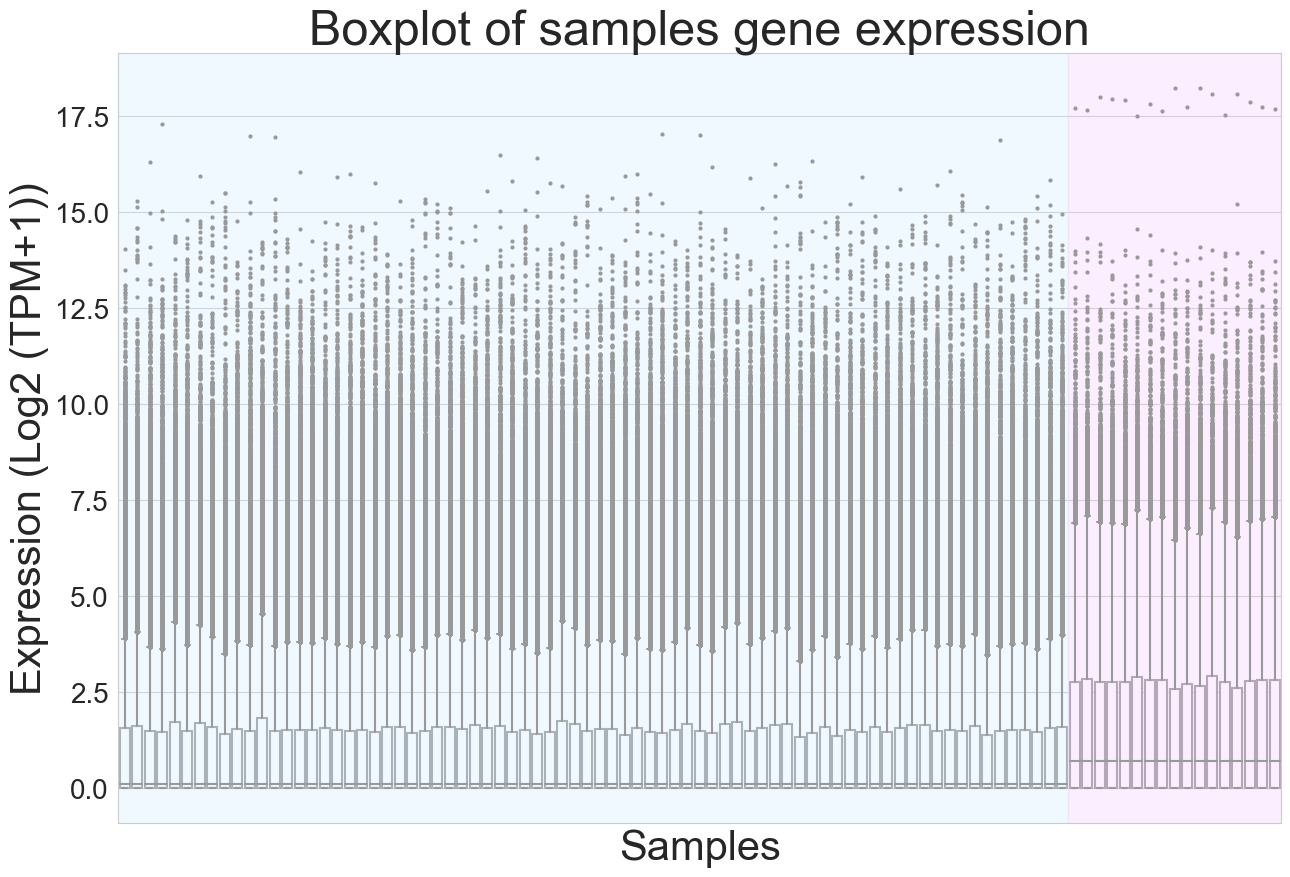

In [7]:
bp_order = subset.median().sort_values().index.tolist()

plt.figure(figsize = (15, 10))
sns.set_style('whitegrid')

sns.boxplot(data = subset, color = 'white', flierprops = {'marker': 'o', 'markersize': 2}, order = bp_order)
plt.axvspan(-0.5, 75.5, color='#CCEDFF', alpha=.3)
plt.axvspan(75.5, 92.5, color='#F4CCFF', alpha=.3)
plt. xticks([])

plt.title('Boxplot of samples gene expression', fontsize = 35)
plt.ylabel('Expression (Log2 (TPM+1))', fontsize = 30)
plt.xlabel('Samples', fontsize = 30)

plt.yticks(fontsize=20)

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/boxplot_2.png')

# Graphic representations of gene expression

## Filter the data

To do graphic representations for the expression of each gene, we rank the data based on the average and the variance of expression (TPMs) for each gene over one, using the euclidean distance from (0, 0) to each data point. So genes with higher distances (top genes) are those that have a wider variance and a higher average around samples. Then, we use the scatter plot to visualize how avergage and variance of each gene are dispersed.

In [8]:
average_expression = log_df.sum(axis=1) / log_df.shape[1]
variance_by_rows = log_df.var(axis=1)

genes_exp = pd.DataFrame({
    'Average': average_expression,
    'Variance': variance_by_rows
})
genes_exp.index = log_df.index
genes_exp.insert(0, 'row_numbers', [index for index, _ in enumerate(genes_exp.index)])

genes_exp['Relative_average'] = genes_exp['Average'] / genes_exp['Average'].max()
genes_exp['Relative_variance'] = genes_exp['Variance'] / genes_exp['Variance'].max()
genes_exp['Euclidean_distance'] = np.sqrt(genes_exp['Relative_average']**2 + genes_exp['Relative_variance']**2)

top_genes = genes_exp.nlargest(500, 'Euclidean_distance')
top_genes.head(5)

,row_numbers,Average,Variance,Relative_average,Relative_variance,Euclidean_distance
gene_id,,,,,,
ENSG00000276168.1,53691,12.790766,18.832261,0.950748,0.638108,1.145034
ENSG00000202538.1,19535,6.004744,29.512659,0.446337,1.000000,1.095088
ENSG00000266019.1,48516,5.088324,29.012358,0.378219,0.983048,1.053296
ENSG00000252010.1,40117,5.319141,28.098152,0.395376,0.952071,1.030903
ENSG00000211592.8,21484,13.449466,4.635187,0.999709,0.157058,1.011971


## Scatter plot

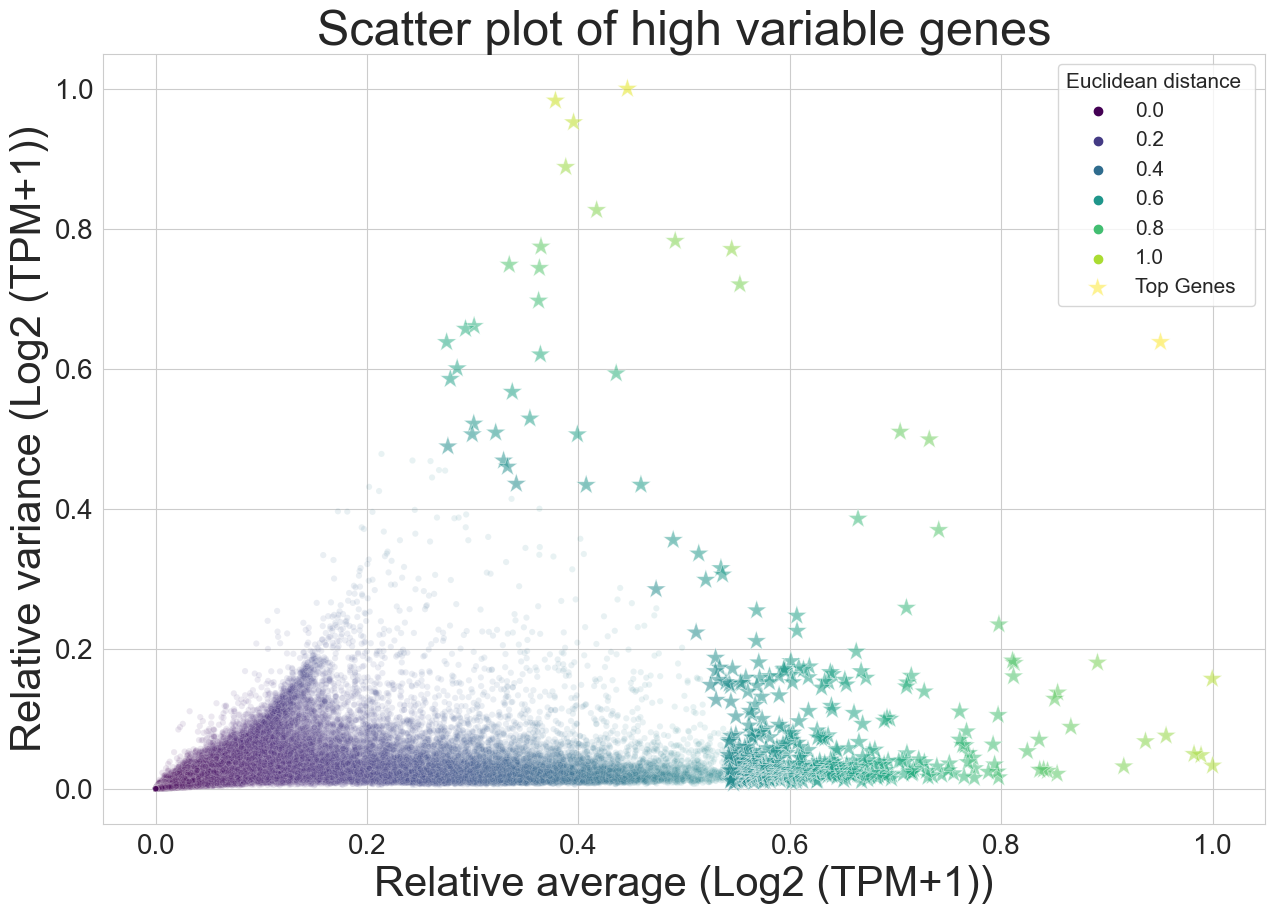

In [9]:
cmap = plt.get_cmap('viridis')
top_genes_colors = cmap(top_genes['Euclidean_distance'] / top_genes['Euclidean_distance'].max())

plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')

sns.scatterplot(x=genes_exp['Relative_average'], y=genes_exp['Relative_variance'], hue=genes_exp['Euclidean_distance'], palette='viridis', s=20, linewidth=0.5, alpha=.1)
plt.scatter(x=top_genes['Relative_average'], y=top_genes['Relative_variance'], color=top_genes_colors, marker='*', s=220, label='Top Genes', linewidth=0.5, edgecolors='white', alpha=.5)  
plt.xlabel('Relative average (Log2 (TPM+1))', fontsize=30)
plt.ylabel('Relative variance (Log2 (TPM+1))', fontsize=30)
plt.title('Scatter plot of high variable genes', fontsize=35)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(title='Euclidean distance ', fontsize=15, title_fontsize=15)  

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/scatterplot_gs.png')

## Heatmaps

Heatmaps are really visual, which can be useful to make an exploratory analysis and understand how genes in the data are expressed, as values are depicted by a color scale.
Top genes of representative samples z-sores are plotted, so we can see some motifs on how genes are expressed relatively for each sample: Few genes are overexpressed around all the samples and various samples show distinct patterns of gene expression. We can also appreciate the two groups of samples we have selected. 

In [10]:
subset.insert(0, 'row_numbers', [index for index, _ in enumerate(subset.index)])
common_rows = subset['row_numbers'].isin(top_genes['row_numbers'])
hm_subset = subset[common_rows]
hm_subset = hm_subset.drop(columns=['row_numbers'])

In [11]:
z_scores = zscore(hm_subset, axis=1, ddof=1)
z_scores.head(5)

,50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv,d3ebb2ea-10db-4c29-8e7c-7c13b23b5b15.rna_seq.augmented_star_gene_counts.tsv,7a7440bf-1ca1-4c6b-80f8-7151a38e5d18.rna_seq.augmented_star_gene_counts.tsv,36db1d28-8a10-46cc-91ef-d5036aaba9c3.rna_seq.augmented_star_gene_counts.tsv,aa0b2722-97db-4b5a-9a56-213f63255097.rna_seq.augmented_star_gene_counts.tsv,e8ea2e59-65dc-49c9-b6f3-b9335185390d.rna_seq.augmented_star_gene_counts.tsv,5511e816-3ce5-4d0c-80a7-71ee42ba8fc9.rna_seq.augmented_star_gene_counts.tsv,1890feb6-9f7f-4437-9828-198ff43e16b0.rna_seq.augmented_star_gene_counts.tsv,0a11e8dc-5d34-4fcb-b2dc-aa57b4e90fc9.rna_seq.augmented_star_gene_counts.tsv,dd20e202-a63c-4281-85c7-f16096212a91.rna_seq.augmented_star_gene_counts.tsv,...,fcc330dd-5ebe-4b5e-9bb7-00e8fe19232c.rna_seq.augmented_star_gene_counts.tsv,8fc6eee8-3ec1-4f6c-a07b-f539ef9cad39.rna_seq.augmented_star_gene_counts.tsv,4f179a2f-1e37-4ad9-9f21-0a6f1ecdf03e.rna_seq.augmented_star_gene_counts.tsv,3169371f-5fd0-40b5-838e-9c57dded9137.rna_seq.augmented_star_gene_counts.tsv,649e5ee8-e10c-4268-a1d7-77b38f5154ea.rna_seq.augmented_star_gene_counts.tsv,fbf226a9-b07a-4aa2-bcb6-ceaac4b373c0.rna_seq.augmented_star_gene_counts.tsv,1827bc9b-0b11-493a-af09-17d13f57698a.rna_seq.augmented_star_gene_counts.tsv,b1840b93-f4c6-4308-bcc4-63da00cd7e8b.rna_seq.augmented_star_gene_counts.tsv,5d83245d-083a-4728-9637-d1c1c2f69d9f.rna_seq.augmented_star_gene_counts.tsv,2ca30f8b-ed4e-478d-87cc-59a4e8249d94.rna_seq.augmented_star_gene_counts.tsv
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000005022.6,-0.604512,0.144343,0.517946,0.121686,-0.509786,-1.522784,-0.424002,0.495019,0.374214,-0.154862,...,1.159907,2.079204,0.726613,1.196181,0.319874,0.122021,0.345172,1.516979,0.216118,-0.915375
ENSG00000008018.9,-0.169984,0.234400,-0.460742,0.573408,-1.398487,-1.394871,-0.457185,1.111226,0.441377,0.170681,...,0.349966,2.116284,1.007147,1.655806,0.942386,1.808365,2.372695,0.049892,-0.472360,-1.299702
ENSG00000008988.11,0.813546,0.229578,0.624624,0.196459,-0.761351,0.800418,0.003086,1.099200,1.638639,0.353627,...,-0.365450,-0.276510,-0.385125,-0.945463,-0.304011,-0.394207,-0.396454,0.349492,-0.396056,-0.329691
ENSG00000009307.16,-2.300539,0.695850,0.540299,-0.433757,-0.666411,-2.576865,0.225110,-0.932597,0.825694,0.630263,...,-0.680997,-0.534202,-1.650444,0.222241,-0.487474,0.754696,-1.004578,-0.245037,-0.001966,0.678651
ENSG00000010278.15,-0.607850,-1.648036,-0.416913,-0.604830,-1.083675,-2.567707,0.377991,0.094234,1.553930,-1.222644,...,1.052880,1.104373,0.759264,1.427636,0.361170,0.737269,0.436767,1.547283,0.720230,0.505254


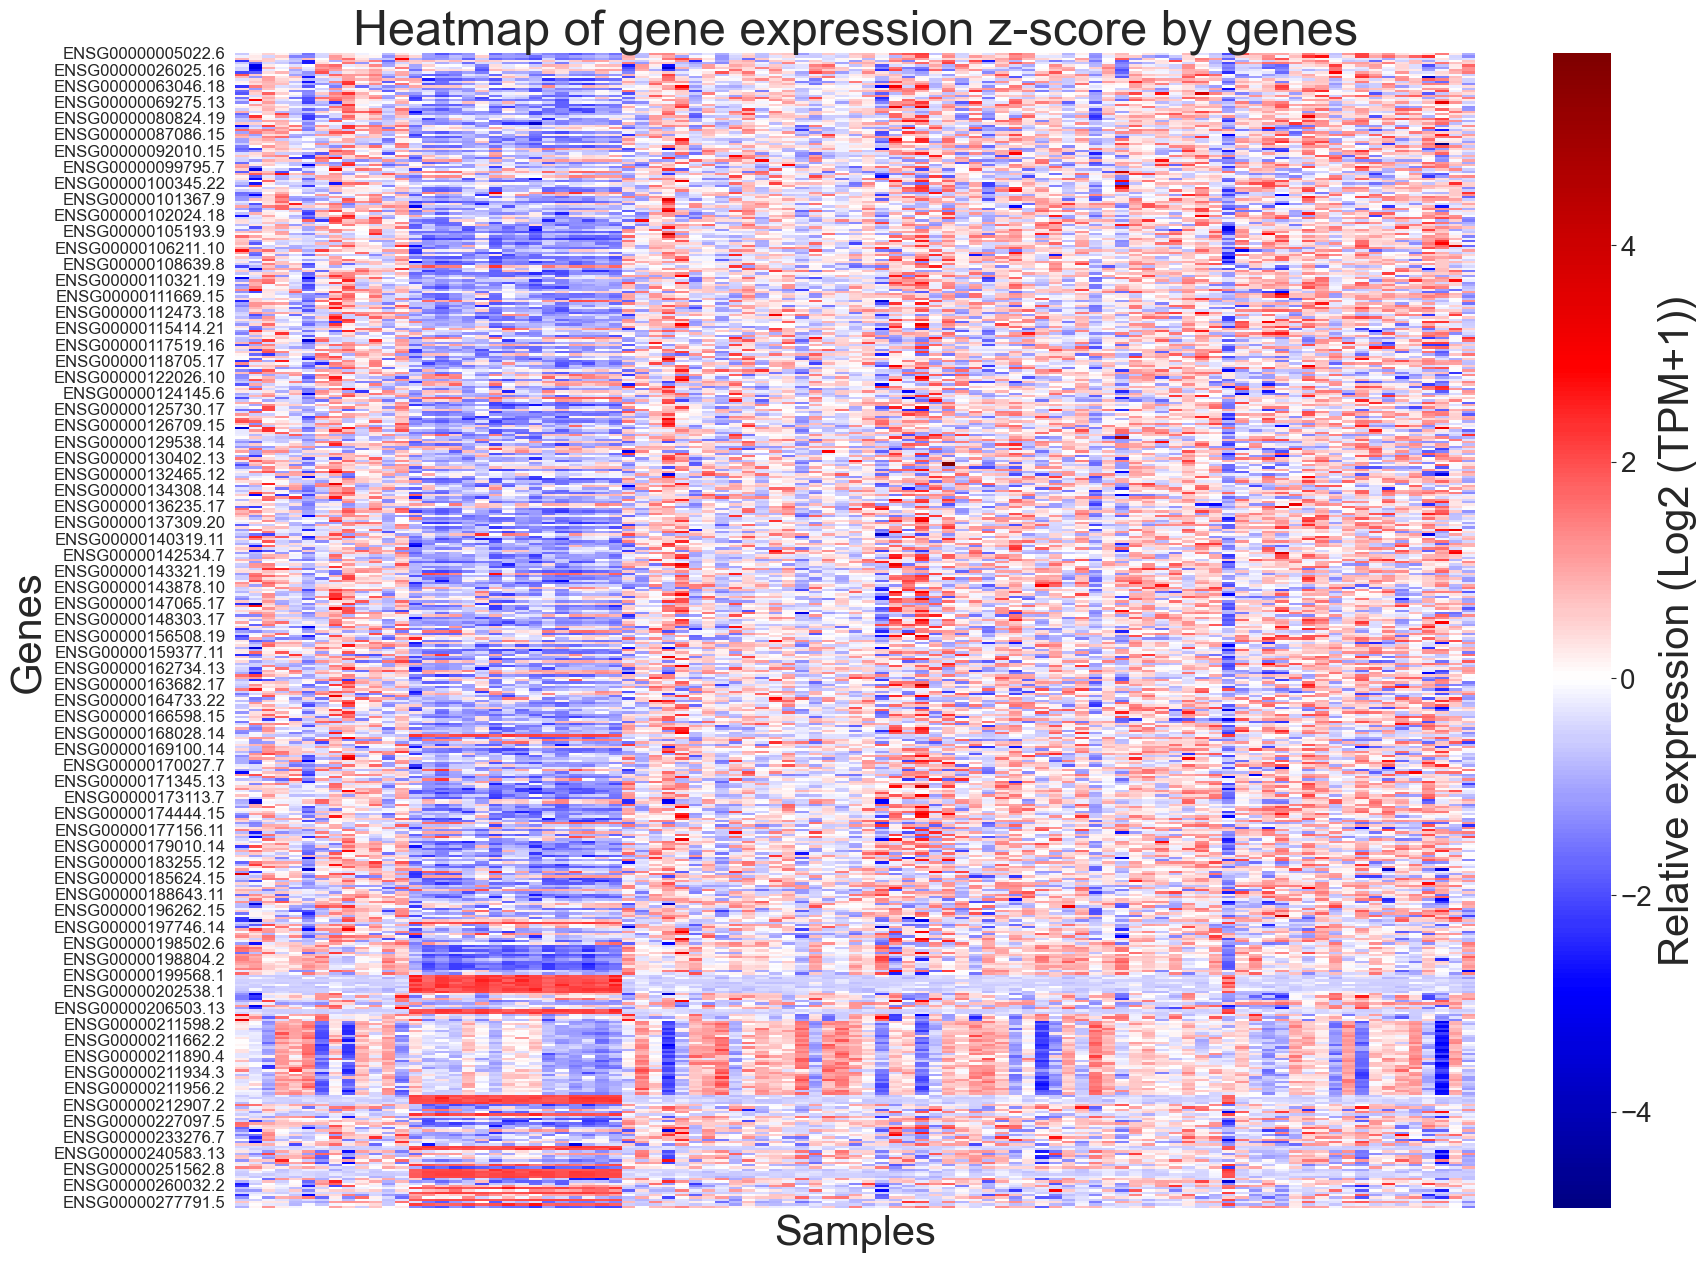

In [12]:
plt.figure(figsize = (20, 15))

heatmap = sns.heatmap(z_scores, cmap = 'seismic', xticklabels = False, center = 0)

plt.title('Heatmap of gene expression z-score by genes', fontsize = 35)
plt.xlabel('Samples', fontsize = 30)
plt.ylabel('Genes', fontsize = 30)

cbar = heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Relative expression (Log2 (TPM+1))', fontsize = 30)
cbar.ax.tick_params(labelsize = 20)
plt.yticks(fontsize = 12)  

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/z_heatmap.png')

/Users/claudiavicentecomorera/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/claudiavicentecomorera/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2000x1500 with 0 Axes>

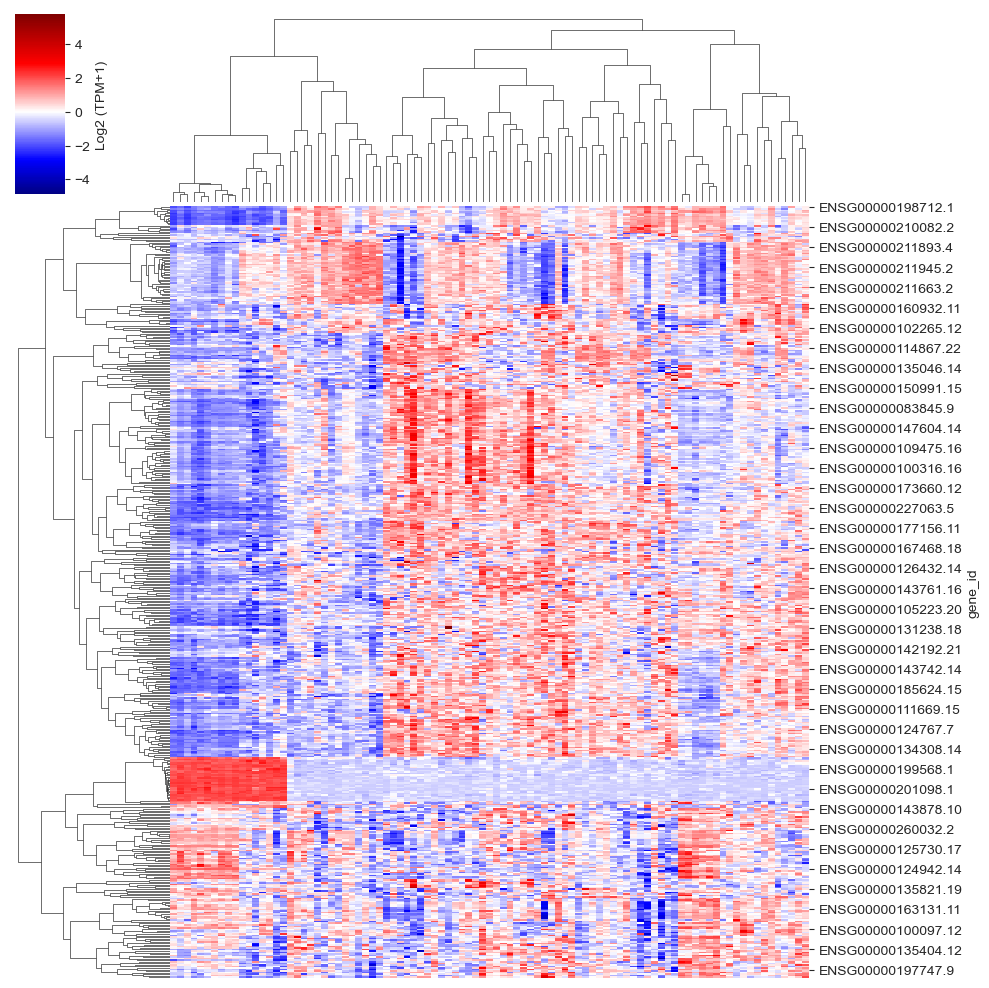

In [13]:
plt.figure(figsize = (20, 15))

sns.clustermap(z_scores, cmap = 'seismic', xticklabels = False, center = 0, 
                         method = 'complete', metric = 'cosine', cbar_kws = {'label':'Log2 (TPM+1)'})

plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/clustermap.png')

To explore a bit more the data, we can plot heatmaps with 1000, 2000 and 5000 genes.

In [14]:
top_1000_genes = genes_exp.nlargest(1000, 'Euclidean_distance')
top_2000_genes = genes_exp.nlargest(2000, 'Euclidean_distance')
top_5000_genes = genes_exp.nlargest(5000, 'Euclidean_distance')

common_1000_rows = subset['row_numbers'].isin(top_1000_genes['row_numbers'])
hm_1000_subset = subset[common_1000_rows]
z_scores_1000 = zscore(hm_subset, axis=0, ddof=0)


common_2000_rows = subset['row_numbers'].isin(top_2000_genes['row_numbers'])
hm_2000_subset = subset[common_2000_rows]
z_scores_2000 = zscore(hm_subset, axis=0, ddof=0)

common_5000_rows = subset['row_numbers'].isin(top_5000_genes['row_numbers'])
hm_5000_subset = subset[common_5000_rows]
z_scores_5000 = zscore(hm_subset, axis=0, ddof=0)

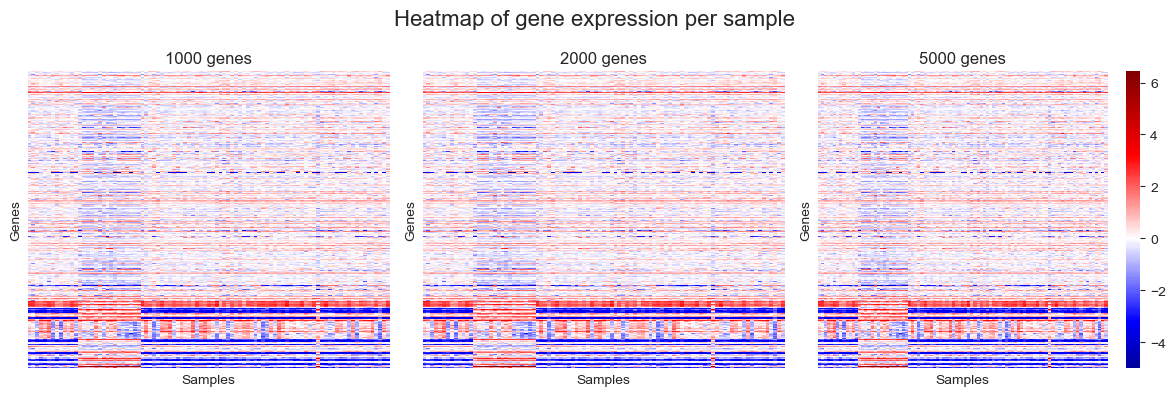

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (12, 4)) 

sns.heatmap(z_scores_1000, ax = axes[0], cmap = 'seismic', xticklabels = False, yticklabels = False, cbar = False, center = 0)
axes[0].set_title('1000 genes')

sns.heatmap(z_scores_2000, ax = axes[1], cmap = 'seismic', xticklabels = False, yticklabels = False, cbar = False, center = 0)
axes[1].set_title('2000 genes')

sns.heatmap(z_scores_5000, ax = axes[2], cmap = 'seismic', xticklabels = False, yticklabels = False, center = 0)
axes[2].set_title('5000 genes')

for ax in axes:
    ax.set_xlabel('Samples')
    ax.set_ylabel('Genes')
plt.suptitle('Heatmap of gene expression per sample', fontsize=16)

plt.tight_layout()
plt.savefig('/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/Graphs/z_heatmaps_3.png')